In [1]:
import json
from json.decoder import JSONDecodeError

In [2]:
%pwd

'/Users/timothymiller/Galvanize/repos/fraud-detection-case-study/notebooks'

### Load Data

In [3]:
with open('../data/raw/data.json', 'r') as handle:
    data = json.load(handle)

In [4]:
# print(json.dumps(VARIABLE, sort_keys=True, indent=4))
print(json.dumps(data[14318], sort_keys=True, indent=4))

{
    "acct_type": "fraudster_event",
    "approx_payout_date": 1359784800,
    "body_length": 448,
    "channels": 0,
    "country": "US",
    "currency": "USD",
    "delivery_method": 0.0,
    "description": "<p>Help us produce this incredible experience. The NYC Speed Dating Expose promises to be the event of the year. We plan to hold the event at 94 Houston Street New York. The event is scheduled for July 5 2013. This fund raising effort is needed for space rental, food, facilitation, security, and other accommodations. We plan to meet up regardless of the amount raised here. Yet the more money collected the more extravagant the event will be.</p>",
    "email_domain": "gmail.com",
    "event_created": 1358975278,
    "event_end": 1359352800,
    "event_published": 1358975588.0,
    "event_start": 1359342000,
    "fb_published": 0,
    "gts": 472.16,
    "has_analytics": 0,
    "has_header": null,
    "has_logo": 1,
    "listed": "n",
    "name": "The NYC Speed Dating Expose",
    

In [5]:
import pandas as pd
df = pd.read_json(r'../data/raw/data.json')

In [6]:
# Are all object_ids unique?
print(len(df))
print(len(df['object_id'].unique()))

14337
14337


In [7]:
# Make target column
df['Fraud'] = df['acct_type'].str.contains('fraud')

In [8]:
# Number of fraud cases:
print(f"Fraud #: {df['Fraud'].sum()}")
# Number of legitimate cases:
print(f"Not Fraud #: {df['Fraud'].count() - df['Fraud'].sum()}")
# Total cases:
print(f"Total #: {df['Fraud'].count()}")

Fraud #: 1293
Not Fraud #: 13044
Total #: 14337


## Binary Proportion Comparison Function

In [9]:
def numeric_comparison(col):
    print(f"value_counts: \n{df[col].value_counts()}")
    print(f"\nFraud proportion: {df[df['Fraud'] == True][col].sum() / df[df['Fraud'] == True][col].count()}")
    print(f"Not fraud proportion: {df[df['Fraud'] == False][col].sum() / df[df['Fraud'] == False][col].count()}")

In [10]:
numeric_comparison('fb_published')

value_counts: 
0    12510
1     1827
Name: fb_published, dtype: int64

Fraud proportion: 0.02242846094354215
Not fraud proportion: 0.13784115302054584


In [11]:
numeric_comparison('has_analytics')

value_counts: 
0    13290
1     1047
Name: has_analytics, dtype: int64

Fraud proportion: 0.0030935808197989174
Not fraud proportion: 0.07996013492793622


In [12]:
numeric_comparison('has_header')

value_counts: 
0.0    7124
1.0    1804
Name: has_header, dtype: int64

Fraud proportion: 0.06936416184971098
Not fraud proportion: 0.2102509216315852


In [13]:
numeric_comparison('has_logo')

value_counts: 
1    12073
0     2264
Name: has_logo, dtype: int64

Fraud proportion: 0.645784996133024
Not fraud proportion: 0.8615455381784729


### body_length:

In [14]:
print(f"Fraud: {df[df['Fraud'] == True].body_length.mean()}")
print(f"Not fraud: {df[df['Fraud'] == False].body_length.mean()}")


Fraud: 1508.8863109048723
Not fraud: 3886.9945568843914


### channels:

Fraud channels mean: 4.149265274555297


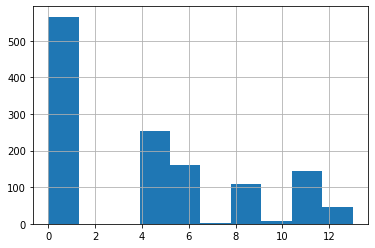

In [24]:
df[df['Fraud'] == True].channels.hist();
print(f"Fraud channels mean: {df[df['Fraud'] == True].channels.mean()}")

Not fraud channels mean: 6.377644894204232


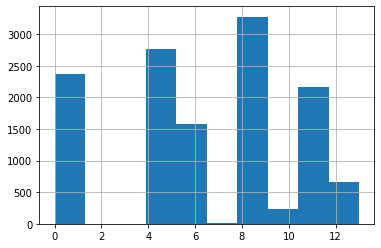

In [25]:
df[df['Fraud'] == False].channels.hist();
print(f"Not fraud channels mean: {df[df['Fraud'] == False].channels.mean()}")

### delivery_method:

Fraud delivery_method mean: 0.4755368098159509


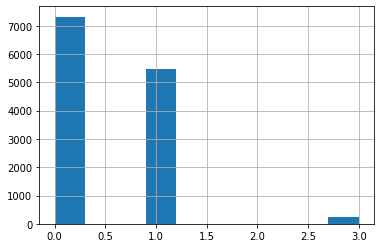

In [17]:
df[df['Fraud'] == False].delivery_method.hist();
print(f"Fraud delivery_method mean: {df[df['Fraud'] == False].delivery_method.mean()}")

Fraud delivery_method mean: 0.07338017174082748


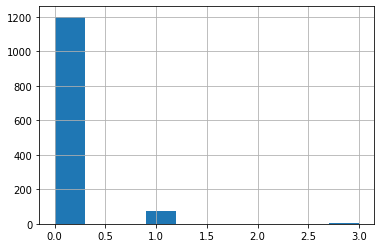

In [18]:
df[df['Fraud'] == True].delivery_method.hist();
print(f"Fraud delivery_method mean: {df[df['Fraud'] == True].delivery_method.mean()}")

### listed:

In [19]:
val_cts_fraud = df[df['Fraud'] == True].listed.value_counts()
val_cts_not_fraud = df[df['Fraud'] == False].listed.value_counts()

print(f"Fraud:\n{val_cts_fraud[0]/(val_cts_fraud[0]+val_cts_fraud[1])}\n")
print(f"Not fraud:\n{val_cts_not_fraud[0]/(val_cts_not_fraud[0]+val_cts_not_fraud[1])}")


Fraud:
0.8321732405259087

Not fraud:
0.8597822753756517


### name_length:

In [20]:
print(f"Fraud:\n{df[df['Fraud'] == True].name_length.mean()}\n")
print(f"Not fraud:\n{df[df['Fraud'] == False].name_length.mean()}")

Fraud:
29.97525135344161

Not fraud:
42.78457528365532


### org_name:

In [21]:
print(f"Fraud:\n{df[df['Fraud'] == True][df['org_name'] != '']['object_id'].count() / df['org_name'].count()}\n")
print(f"Not fraud:\n{df[df['Fraud'] == False][df['org_name'] != '']['object_id'].count() / df['org_name'].count()}")

Fraud:
0.059077910302015764

Not fraud:
0.8389481760479878


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
df['org_twitter'].value_counts()

0.0     9121
15.0     847
14.0     667
12.0     613
13.0     589
11.0     509
10.0     446
16.0     354
9.0      332
8.0      317
7.0      188
6.0      131
5.0       62
2.0       38
4.0       30
17.0      12
23.0       6
3.0        5
18.0       4
20.0       3
21.0       2
19.0       1
34.0       1
Name: org_twitter, dtype: int64

### venue_address

In [23]:
print(f"Fraud:\n{df[df['Fraud'] == True][df['venue_address'] != '']['object_id'].count() / df['venue_address'].count()}\n")
print(f"Not fraud:\n{df[df['Fraud'] == False][df['venue_address'] != '']['object_id'].count() / df['venue_address'].count()}")
      

Fraud:
0.05182395201227593

Not fraud:
0.796749668689405


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
